In [13]:
#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline
plt.rcParams['axes.unicode_minus']= False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() =='Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')


# 폴더에 있는 데이터 모두 읽어오기
import glob
files = glob.glob('../data/dust/*.csv', recursive=True)
files

['../data/dust\\april_4.csv',
 '../data/dust\\august_8.csv',
 '../data/dust\\december_12.csv',
 '../data/dust\\feburary_2.csv',
 '../data/dust\\january_1.csv',
 '../data/dust\\july_7.csv',
 '../data/dust\\june_6.csv',
 '../data/dust\\march_3.csv',
 '../data/dust\\may_5.csv',
 '../data/dust\\november_11.csv',
 '../data/dust\\october_10.csv',
 '../data/dust\\september_9.csv']

In [14]:
df0 = pd.read_csv(files[0], engine ='python', index_col=1)
df = pd.DataFrame(index= df0.index) #빈 데이터 프레임 만들기 , index까지는 만들어 둔다. 어짜피 '기준열'에 맞춰서 로 결합할 예정
for file in files:
    df_source = pd.read_csv(file, engine ='python', index_col=1)
    df = pd.concat([df,df_source], axis =1 ) #일반형

del df['Unnamed: 0']
df = df.fillna(value =2.0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
...1,,,,,,,,,,,,,,,,,,,,,
서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2,2,2,2,2,1,1,2,2,2.0
종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1,1,2,2,2,1,1,1,2,2.0
중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2,2,2,2,2,1,1,2,2,2.0
용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2,1,2,2,2,1,1,1,2,2.0
성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,3,2,2,1,1,2,2,2.0


In [15]:
aa = df.iloc[0].value_counts()
aa # pandas.core.series.Series

2.0    176
1.0    127
0.0     43
3.0     26
Name: 서울시 평균, dtype: int64

In [16]:
lst = []
for i in range(26):
    lst.append(df.iloc[i].value_counts())

In [17]:
lst
dfdf = pd.DataFrame(lst)

In [18]:
dfdf_index = dfdf.index
dfdf_index

Index(['서울시 평균', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object')

In [27]:
dfdf.head()

,0.0,1.0,2.0,3.0
서울시 평균,43,127,176,26
종로구,52,150,151,19
중구,47,151,155,19
용산구,67,135,152,18
성동구,27,135,175,35


In [11]:
# dfdf = dfdf.reset_index()
# dfdf.head()

In [20]:
#dfdf = dfdf.set_index(dfdf['index'])

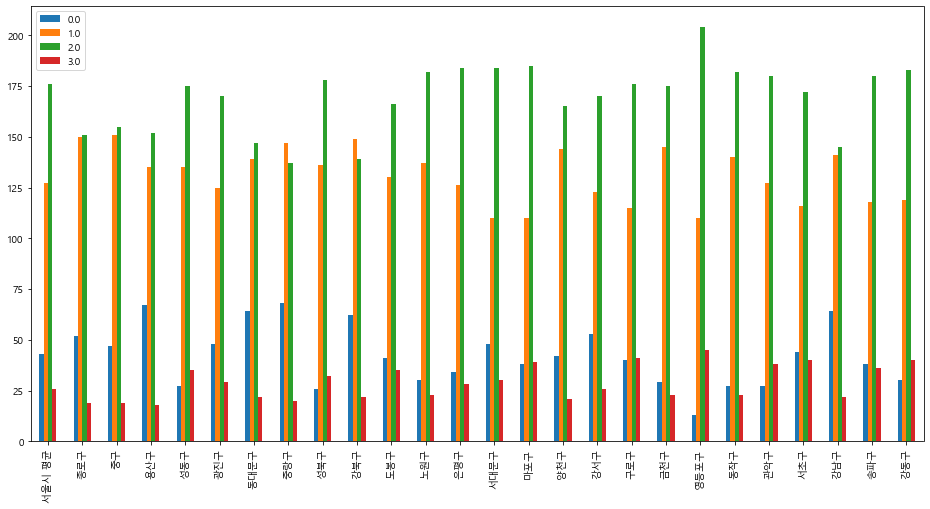

In [26]:
#plt.figure(figsize =(20,12))
dfdf.plot.bar(figsize =(16,8))

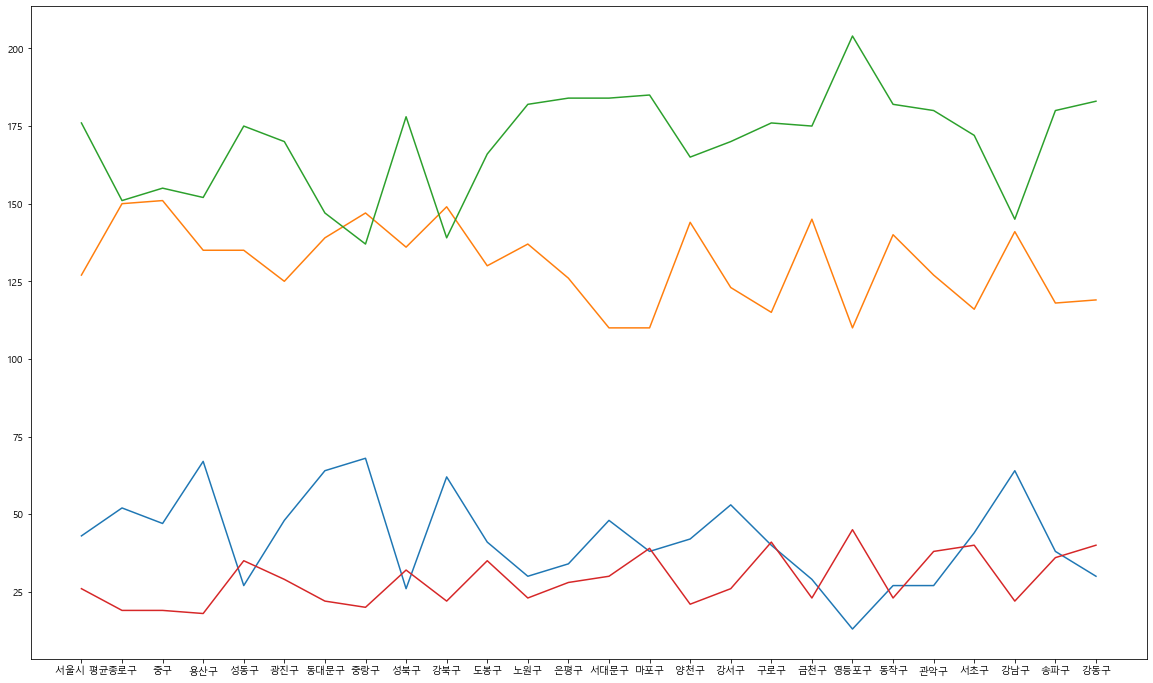

In [21]:
plt.figure(figsize =(20,12))
plt.plot(dfdf_index, dfdf.values)